## Import library

In [206]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Initial ny map

In [207]:
#new york latitude and longtitude value
latitude = 40.7128
longitude = -74.0060

In [208]:
# create map and display it
ny_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of New York
ny_map

In [209]:
import os
print("Current Working DIrectory",os.getcwd())

Current Working DIrectory /Users/biyingdeng/Desktop/Coursera


### newyork_data are from Coursera course

In [210]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [211]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

## Transform data into a pandas dataframe

In [212]:
newyork_data.keys()

dict_keys(['type', 'totalFeatures', 'features', 'crs', 'bbox'])

In [213]:
dat=newyork_data['features']

In [214]:
col_name = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
dat2 = pd.DataFrame(columns=col_name)

In [215]:
for dd in dat:
    borough = name = dd['properties']['borough'] 
    name = dd['properties']['name']
        
    location = dd['geometry']['coordinates']
    lat = location[1]
    lon = location[0]
    
    dat2 = dat2.append({'Borough': borough,
                        'Neighborhood':name,
                        'Latitude': lat,
                        'Longitude': lon}, ignore_index=True)

In [216]:
dat2.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [217]:
latitude=40.7127281
longitude=-74.0060152
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(dat2['Latitude'], dat2['Longitude'], dat2['Borough'], dat2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## narrow down Manhattan

In [218]:
dat2['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [219]:
dat2

Borough               Neighborhood   Latitude  Longitude
0            Bronx                  Wakefield  40.894705 -73.847201
1            Bronx                 Co-op City  40.874294 -73.829939
2            Bronx                Eastchester  40.887556 -73.827806
3            Bronx                  Fieldston  40.895437 -73.905643
4            Bronx                  Riverdale  40.890834 -73.912585
5            Bronx                Kingsbridge  40.881687 -73.902818
6        Manhattan                Marble Hill  40.876551 -73.910660
7            Bronx                   Woodlawn  40.898273 -73.867315
8            Bronx                    Norwood  40.877224 -73.879391
9            Bronx             Williamsbridge  40.881039 -73.857446
10           Bronx                 Baychester  40.866858 -73.835798
11           Bronx             Pelham Parkway  40.857413 -73.854756
12           Bronx                City Island  40.847247 -73.786488
13           Bronx               Bedford Park  40.870185 -73.885512
14           Bronx         University Heights  40.855727 -73.910416
15           Bronx             Morris Heights  40.847898 -73.919672
16           Bronx                    Fordham  40.860997 -73.896427
17           Bronx               East Tremont  40.842696 -73.887356
18           Bronx                 West Farms  40.839475 -73.877745
19           Bronx               High  Bridge  40.836623 -73.926102
20           Bronx                    Melrose  40.819754 -73.909422
21           Bronx                 Mott Haven  40.806239 -73.916100
22           Bronx                Port Morris  40.801664 -73.913221
23           Bronx                   Longwood  40.815099 -73.895788
24           Bronx                Hunts Point  40.809730 -73.883315
25           Bronx                 Morrisania  40.823592 -73.901506
26           Bronx                  Soundview  40.821012 -73.865746
27           Bronx               Clason Point  40.806551 -73.854144
28           Bronx                Throgs Neck  40.815109 -73.816350
29           Bronx               Country Club  40.844246 -73.824099
30           Bronx                Parkchester  40.837938 -73.856003
31           Bronx         Westchester Square  40.840619 -73.842194
32           Bronx                   Van Nest  40.843608 -73.866299
33           Bronx                Morris Park  40.847549 -73.850402
34           Bronx                    Belmont  40.857277 -73.888452
35           Bronx             Spuyten Duyvil  40.881395 -73.917190
36           Bronx            North Riverdale  40.908543 -73.904531
37           Bronx                 Pelham Bay  40.850641 -73.832074
38           Bronx              Schuylerville  40.826580 -73.826203
39           Bronx             Edgewater Park  40.821986 -73.813885
40           Bronx                Castle Hill  40.819014 -73.848027
41           Bronx                  Olinville  40.871371 -73.863324
42           Bronx             Pelham Gardens  40.862966 -73.841612
43           Bronx                  Concourse  40.834284 -73.915589
44           Bronx                  Unionport  40.829774 -73.850535
45           Bronx                   Edenwald  40.884561 -73.848083
46        Brooklyn                  Bay Ridge  40.625801 -74.030621
47        Brooklyn                Bensonhurst  40.611009 -73.995180
48        Brooklyn                Sunset Park  40.645103 -74.010316
49        Brooklyn                 Greenpoint  40.730201 -73.954241
50        Brooklyn                  Gravesend  40.595260 -73.973471
51        Brooklyn             Brighton Beach  40.576825 -73.965094
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438
54        Brooklyn                   Flatbush  40.636326 -73.958401
55        Brooklyn              Crown Heights  40.670829 -73.943291
56        Brooklyn              East Flatbush  40.641718 -73.936103
57        Brooklyn                 Kensington  40.642382 -73.980421

In [220]:
man_dat=dat2[dat2['Borough']=='Manhattan'].reset_index(drop=True)
man_dat.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [221]:
man_dat['Neighborhood'].unique()

array(['Marble Hill', 'Chinatown', 'Washington Heights', 'Inwood',
       'Hamilton Heights', 'Manhattanville', 'Central Harlem',
       'East Harlem', 'Upper East Side', 'Yorkville', 'Lenox Hill',
       'Roosevelt Island', 'Upper West Side', 'Lincoln Square', 'Clinton',
       'Midtown', 'Murray Hill', 'Chelsea', 'Greenwich Village',
       'East Village', 'Lower East Side', 'Tribeca', 'Little Italy',
       'Soho', 'West Village', 'Manhattan Valley', 'Morningside Heights',
       'Gramercy', 'Battery Park City', 'Financial District',
       'Carnegie Hill', 'Noho', 'Civic Center', 'Midtown South',
       'Sutton Place', 'Turtle Bay', 'Tudor City', 'Stuyvesant Town',
       'Flatiron', 'Hudson Yards'], dtype=object)

In [222]:
man_dat2=man_dat.copy()
man_dat2.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

#### 'zipcode' data was from wikipidia that I search one by one accoridng to the Neighborhood
####  Income data was searched one by one from website 'https://www.incomebyzipcode.com/'

#### Part of the Population data are from https://www.worldatlas.com/articles/manhattan-neighborhoods-by-population.html, and part of them are searched from wikipidia.

In [223]:
df=pd.DataFrame({
    'Zipcode':['10463','10002,10013','10032,10033,10040','10034,10040',
               '10031,10032,10039','10027,10031','10026, 10027, 10030, 10037, 10039',
               '10029,10035','10021,10028,10065,10075,10128','10028, 10075, 10128','10021','10044',
               '10023, 10024, 10025, 10069','10023','13323','10001, 10016–10019, 10022, 10036','10017',
              '10001,10011','10014','10009','10002','10013','10013','10012','10014',
              '10025','10027','10010','10280','10005','10029','10003,10011,10012','10007',
              '10001, 10016–10019, 10022, 10036','10022','10022','10022','10003,10009','10010','10001'],
   
    'Median Household Income':[58881,35449,41890,50909,44040,45536,54349,34015,123842,
                                123842,123842,92623,123951,123951,63906 ,85221,118469,85221,
                              127973,60521,35449,106056,106056,104561,127973,82352,45536,115084,
                               161419,154213,34015,104441,242644,85221,133208,133208,133208,104441,177950,85221],
    
     'Average Household Income':[82103,65718,60656,65924,64971,77728,95709,65837,225235,
                                 225235,225235,127178,209783,209783,91574,161227,169169,161227,
                                 204690,90253,65718,252811,252811,160244,204690,147611,77728,177950,
                                 220261,201734,65837,182531,376573,161227,246355,246355,246355,182531,177950,161227],
    
     'Per-capita Income':[33630,30677,23217,26216,26417,30256,39354,27966,125769,125769,
                          125769,53174,114641,114641,43560,86014,106244,86014,122098,47782,
                          30677,107794,107794,85491,122098,68995,30256,88872,108281,102957,27966,91141,
                          153897,86014,145479,45479,145479,91141,88872,86014],
    'Population':[9481,100000,158318,46746,48520,40568,115000,115921,229688,35221,89228,11945,209084,61489,
                  1939,391371,10284,38242,22785,62832,72957,17362,1211,19573,31794,94382,55929,27988,39699,
                  60976,48298,24846,5721,28630,30807,24856,16388,21049,8547,23947]
})
df.head()

Zipcode  Median Household Income  Average Household Income  \
0              10463                    58881                     82103   
1        10002,10013                    35449                     65718   
2  10032,10033,10040                    41890                     60656   
3        10034,10040                    50909                     65924   
4  10031,10032,10039                    44040                     64971   

   Per-capita Income  Population  
0              33630        9481  
1              30677      100000  
2              23217      158318  
3              26216       46746  
4              26417       48520

Put our new data together with previous neighborhood data

In [224]:
man_dat_new=pd.concat([man_dat,df],axis=1)
man_dat_new.head()

Borough        Neighborhood   Latitude  Longitude            Zipcode  \
0  Manhattan         Marble Hill  40.876551 -73.910660              10463   
1  Manhattan           Chinatown  40.715618 -73.994279        10002,10013   
2  Manhattan  Washington Heights  40.851903 -73.936900  10032,10033,10040   
3  Manhattan              Inwood  40.867684 -73.921210        10034,10040   
4  Manhattan    Hamilton Heights  40.823604 -73.949688  10031,10032,10039   

   Median Household Income  Average Household Income  Per-capita Income  \
0                    58881                     82103              33630   
1                    35449                     65718              30677   
2                    41890                     60656              23217   
3                    50909                     65924              26216   
4                    44040                     64971              26417   

   Population  
0        9481  
1      100000  
2      158318  
3       46746  
4       48520

In [225]:
man_dat_new2=man_dat_new[['Neighborhood','Median Household Income','Average Household Income','Per-capita Income','Population']]
man_dat_new2.head()

Neighborhood  Median Household Income  Average Household Income  \
0         Marble Hill                    58881                     82103   
1           Chinatown                    35449                     65718   
2  Washington Heights                    41890                     60656   
3              Inwood                    50909                     65924   
4    Hamilton Heights                    44040                     64971   

   Per-capita Income  Population  
0              33630        9481  
1              30677      100000  
2              23217      158318  
3              26216       46746  
4              26417       48520

In [226]:
import numpy as np
import matplotlib.pyplot as plt
def plot_income(column):
    
    # sort the value according to the income feature
    man_dat_new_sorted=man_dat_new.sort_values(column)
    label=man_dat_new_sorted['Neighborhood']
    income=man_dat_new_sorted[column]
    index=np.arange(len(label))
    plt.bar(index,income)
    plt.xlabel('Neighborhood',fontsize=5)
    plt.ylabel(column)
    plt.xticks(index,label,fontsize=7,rotation=90)
    plt.title(column+ ' '+ 'For Each Neighborhoods')
    plt.show()


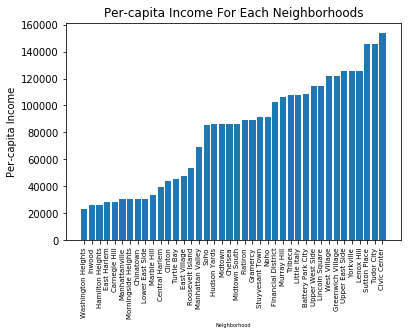

In [227]:
plot_income('Per-capita Income')

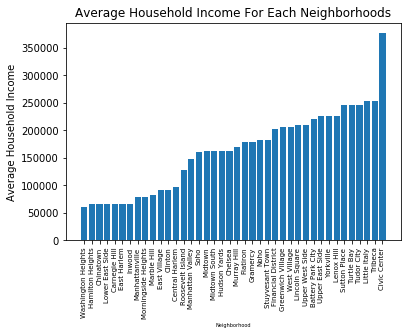

In [228]:
plot_income('Average Household Income')

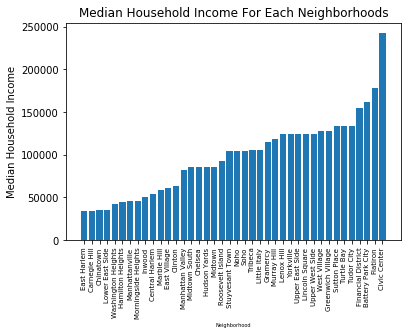

In [229]:
plot_income('Median Household Income')

In [230]:
def plot_pop(column):
    
    # sort the value according to the income feature
    man_dat_new_sorted=man_dat_new.sort_values(column)
    label=man_dat_new_sorted['Neighborhood']
    pop=man_dat_new_sorted[column]
    index=np.arange(len(label))
    plt.bar(index,pop)
    plt.xlabel('Neighborhood',fontsize=5)
    plt.ylabel(column)
    plt.xticks(index,label,fontsize=7,rotation=90)
    plt.title(column+ ' '+ 'For Each Neighborhoods')
    plt.show()

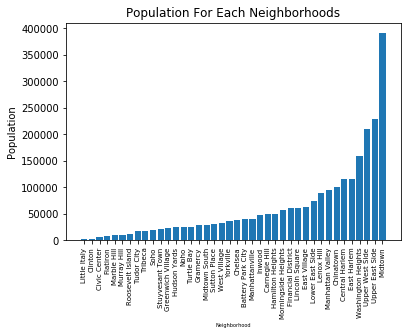

In [231]:
plot_pop('Population')

In [232]:
#Manhattan latitude and longitude
latitude=40.7900869
longitude=-73.9598295
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(man_dat['Latitude'], man_dat['Longitude'], man_dat['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
map_manhattan

### Quick view of crime data in New York

In [233]:
crime=pd.read_csv('Crime_Map_.csv')
crime.head()

CMPLNT_NUM  ADDR_PCT_CD    BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0   857927015         10.0  MANHATTAN   01/29/2019     16:37:00   01/29/2019   
1   479254687        101.0     QUEENS   03/29/2019     17:00:00   03/29/2019   
2   320007604         41.0      BRONX   02/06/2019     02:00:00          NaN   
3   746022144         68.0   BROOKLYN   01/08/2019     22:49:00   01/08/2019   
4   145366108         25.0  MANHATTAN   02/11/2019     12:07:00          NaN   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT         JURIS_DESC  KY_CD  \
0     16:45:00        COMPLETED        NaN   N.Y. POLICE DEPT    106   
1     17:10:00        COMPLETED        NaN   N.Y. POLICE DEPT    107   
2          NaN        COMPLETED        NaN   N.Y. POLICE DEPT    105   
3     22:52:00        COMPLETED        NaN   N.Y. POLICE DEPT    117   
4          NaN        COMPLETED        NaN  N.Y. STATE POLICE    236   

    LAW_CAT_CD LOC_OF_OCCUR_DESC          OFNS_DESC PARKS_NM  PD_CD  \
0       FELONY               NaN     FELONY ASSAULT      NaN  109.0   
1       FELONY            INSIDE           BURGLARY      NaN  221.0   
2       FELONY            INSIDE            ROBBERY      NaN  396.0   
3       FELONY               NaN    DANGEROUS DRUGS      NaN  503.0   
4  MISDEMEANOR               NaN  DANGEROUS WEAPONS      NaN  782.0   

                          PD_DESC           PREM_TYP_DESC      RPT_DT  \
0        ASSAULT 2,1,UNCLASSIFIED                  STREET  01/30/2019   
1          BURGLARY,RESIDENCE,DAY  RESIDENCE - APT. HOUSE  03/29/2019   
2    ROBBERY,BEGIN AS SHOPLIFTING              DRUG STORE  02/06/2019   
3  CONTROLLED SUBSTANCE,INTENT TO                  STREET  01/08/2019   
4        WEAPONS, POSSESSION, ETC                  STREET  02/11/2019   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude                        Lat_Lon  
0    984140.0    211709.0  40.747777 -74.000398  (40.747777093, -74.000398443)  
1   1054076.0    157437.0  40.598538 -73.748560  (40.598537593, -73.748559596)  
2   1011589.0    237996.0  40.819886 -73.901227  (40.819885621, -73.901226998)  
3    984439.0    166855.0  40.624663 -73.999321  (40.624663129, -73.999320591)  
4   1002776.0    231994.0  40.803435 -73.933084    (40.80343468, -73.93308448)

In [234]:
crime.shape

(222398, 24)

#### Only pick the columns that we needed to reduce the dimmension of dataset

In [235]:
cr=crime[['CMPLNT_NUM','BORO_NM','CMPLNT_FR_DT','LAW_CAT_CD','Latitude','Longitude']]
crime2=cr.copy()
crime2.head()

CMPLNT_NUM    BORO_NM CMPLNT_FR_DT   LAW_CAT_CD   Latitude  Longitude
0   857927015  MANHATTAN   01/29/2019       FELONY  40.747777 -74.000398
1   479254687     QUEENS   03/29/2019       FELONY  40.598538 -73.748560
2   320007604      BRONX   02/06/2019       FELONY  40.819886 -73.901227
3   746022144   BROOKLYN   01/08/2019       FELONY  40.624663 -73.999321
4   145366108  MANHATTAN   02/11/2019  MISDEMEANOR  40.803435 -73.933084

In [236]:
crime2.shape

(222398, 6)

This dataset have three types of crime complaint

In [237]:
crime2.LAW_CAT_CD.value_counts()

MISDEMEANOR    119913
FELONY          67097
VIOLATION       35388
Name: LAW_CAT_CD, dtype: int64

Crime complaints total count for each Borough in Manhattan, and Manhattan was top 2 number of crime complaints.

In [238]:
crime2.BORO_NM.value_counts()

BROOKLYN         64160
MANHATTAN        55666
BRONX            48605
QUEENS           44506
STATEN ISLAND     9323
Name: BORO_NM, dtype: int64

check missing value 

### Filtering crime complaint data only in Manhattan

In [239]:
crime_dat=crime2[crime2['BORO_NM']=='MANHATTAN'].reset_index(drop=True)
crime_dat.head()

CMPLNT_NUM    BORO_NM CMPLNT_FR_DT   LAW_CAT_CD   Latitude  Longitude
0   857927015  MANHATTAN   01/29/2019       FELONY  40.747777 -74.000398
1   145366108  MANHATTAN   02/11/2019  MISDEMEANOR  40.803435 -73.933084
2   889702556  MANHATTAN   03/11/2019       FELONY  40.812419 -73.945694
3   816741975  MANHATTAN   03/30/2019       FELONY  40.763320 -73.973718
4   445955216  MANHATTAN   01/02/2019       FELONY  40.786154 -73.972423

In [240]:
crime_dat.CMPLNT_NUM.count()

55666

### Since it is time consuming for producing plot for all 55666 case, I only select 5000 case here. Feel free to adjust the limit.

In [241]:
# get the first 5000 crimes in the df_incidents dataframe
limit = 5000
df_incidents = crime_dat.iloc[0:limit, :]
df_incidents.head()

CMPLNT_NUM    BORO_NM CMPLNT_FR_DT   LAW_CAT_CD   Latitude  Longitude
0   857927015  MANHATTAN   01/29/2019       FELONY  40.747777 -74.000398
1   145366108  MANHATTAN   02/11/2019  MISDEMEANOR  40.803435 -73.933084
2   889702556  MANHATTAN   03/11/2019       FELONY  40.812419 -73.945694
3   816741975  MANHATTAN   03/30/2019       FELONY  40.763320 -73.973718
4   445955216  MANHATTAN   01/02/2019       FELONY  40.786154 -73.972423

In [242]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
ny_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(ny_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Latitude, df_incidents.Longitude, df_incidents.LAW_CAT_CD):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
ny_map



## Let's start our scraping from Foursquare API for venues in each neighborhoods

#### Notes: credentails are being hidded

## All neighborhoods in Manhattan

In [245]:
man_dat.loc[0, 'Neighborhood']
neighborhood_latitude = man_dat.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = man_dat.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = man_dat.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


## Let's scrap all venues around these neighborhoods

In [246]:
import requests 

radius=500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
results = requests.get(url).json()


# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
# To get all nearby venues
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat        lng
0       Arturo's  Pizza Place  40.874412 -73.910271
1    Bikram Yoga  Yoga Studio  40.876844 -73.906204
2  Tibbett Diner        Diner  40.880404 -73.908937
3      Starbucks  Coffee Shop  40.877531 -73.905582
4        Dunkin'   Donut Shop  40.877136 -73.906666

In [247]:
nearby_venues.shape

(24, 4)

In [248]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

man_venues = getNearbyVenues(names=man_dat['Neighborhood'],
                                   latitudes=man_dat['Latitude'],
                                   longitudes=man_dat['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [249]:
print(man_venues.shape)
man_venues.head()

(3324, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

In [250]:
man_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                      100                     100    100   
Carnegie Hill                          100                     100    100   
Central Harlem                          44                      44     44   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             45                      45     45   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                               100                     100    100   
Greenwich Village                      100                     100    100   
Hamilton Heights                        61                      61     61   
Hudson Yards                            79                      79     79   
Inwood                                  55                      55     55   
Lenox Hill                             100                     100    100   
Lincoln Square                         100                     100    100   
Little Italy                           100                     100    100   
Lower East Side                         58                      58     58   
Manhattan Valley                        63                      63     63   
Manhattanville                          41                      41     41   
Marble Hill                             24                      24     24   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     42                      42     42   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        24                      24     24   
Soho                                   100                     100    100   
Stuyvesant Town                         21                      21     21   
Sutton Place                           100                     100    100   
Tribeca                                100                     100    100   
Tudor City                              82                      82     82   
Turtle Bay                             100                     100    100   
Upper East Side                        100                     100    100   
Upper West Side                        100                     100    100   
Washington Heights                      85                      85     85   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City               100              100             100  
Carnegie Hill                   100              100             100  
Central Harlem                   44               44              44  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      45               45              45  
East Village                    100              100             100  
Finan

In [251]:
print('There are {} uniques categories.'.format(len(man_venues['Venue Category'].unique())))

There are 337 uniques categories.


## Analyze Each Neighborhood

In [252]:
# one hot encoding
man_onehot = pd.get_dummies(man_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
man_onehot['Neighborhood'] = man_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [man_onehot.columns[-1]] + list(man_onehot.columns[:-1])
man_onehot = man_onehot[fixed_columns]

man_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Animal Shelter  Antique Shop  \
0                   0                    0               0             0   
1                   0                    0               0             0   
2                   0                    0               0             0   
3                   0                    0               0             0   
4                   0                    0               0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                    0                 0                   0           0   
1                    0                 0                   0           0   
2                    0                 0                   0           0   
3                    0                 0                   0           0   
4                    0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Workshop  BBQ Joint  \
0                      0                    0              0          0   
1                      0                    0              0          0   
2                      0                    0              0          0   
3                      0                    0              0          0   
4                      0                    0              0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0           0       0     0    0               0   
1           0           0       0     0    0               0   
2           0           0       0     0    0               0   
3           0           0       0     0    0               0   
4           0           0       0     0    0               0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0                 0                0         0            0           0   
1                 0                0         0            0           0   
2                 0                0         0            0           0   
3                 0                0         0            0           0   
4                 0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0                         0          0           0       0   
4              0                         0          0           0       0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0           0              0          0         0           0   
1           0              0          0         0           0   
2           0              0          0         0           0   
3           0              0          0         0           0   
4           0              0          0         0           0   

   Brazilian Restaurant  Breakfas

In [253]:
man_grouped = man_onehot.groupby('Neighborhood').mean().reset_index()


In [254]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [255]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = man_grouped['Neighborhood']

for ind in np.arange(man_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park           Coffee Shop   
1      Carnegie Hill           Coffee Shop           Pizza Place   
2     Central Harlem    African Restaurant            Public Art   
3            Chelsea           Coffee Shop    Italian Restaurant   
4          Chinatown    Chinese Restaurant          Cocktail Bar   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0                 Hotel                    Gym         Memorial Site   
1        Cosmetics Shop                   Café   Japanese Restaurant   
2     French Restaurant     Seafood Restaurant    Chinese Restaurant   
3                Bakery         Ice Cream Shop             Nightclub   
4   American Restaurant  Vietnamese Restaurant                Bakery   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Italian Restaurant             Wine Shop         Shopping Mall   
1         Grocery Store     French Restaurant           Yoga Studio   
2                   Bar  Gym / Fitness Center   American Restaurant   
3                 Hotel               Theater   American Restaurant   
4       Bubble Tea Shop                   Spa    Salon / Barbershop   

  9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place             Food Court  
1             Bookstore                    Bar  
2   Fried Chicken Joint                 Market  
3    Seafood Restaurant           Cycle Studio  
4      Asian Restaurant      Korean Restaurant

### Top 10 most common venues for higher household income neighborhood

In [256]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'].isin(['Civic Center', 'Turtle Bay', 'Financial District', 'Tudor City'])]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
5         Civic Center  Gym / Fitness Center    Italian Restaurant   
9   Financial District           Coffee Shop           Pizza Place   
33          Tudor City                  Café                  Park   
34          Turtle Bay    Italian Restaurant      Sushi Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5            Coffee Shop     French Restaurant                 Hotel   
9              Wine Shop                 Hotel                   Gym   
33    Mexican Restaurant      Greek Restaurant      Sushi Restaurant   
34            Steakhouse              Wine Bar           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5         Sandwich Place   Sporting Goods Shop   American Restaurant   
9            Event Space   American Restaurant  Gym / Fitness Center   
33         Deli / Bodega           Pizza Place                Garden   
34   Japanese Restaurant                  Café     French Restaurant   

   9th Most Common Venue 10th Most Common Venue  
5           Cocktail Bar                   Park  
9           Cocktail Bar             Steakhouse  
33               Dog Run                  Diner  
34      Ramen Restaurant      Indian Restaurant

### Top 10 most common venus for less crime reported neighborhood

In [257]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'].isin(['Upper West Side','Yorkville','Lincoln Square'])]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
17   Lincoln Square               Theater  Gym / Fitness Center   
36  Upper West Side    Italian Restaurant              Wine Bar   
39        Yorkville    Italian Restaurant                   Gym   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
17                  Café                 Plaza          Concert Hall   
36           Coffee Shop     Indian Restaurant                Bakery   
39                   Bar           Coffee Shop           Pizza Place   

   6th Most Common Venue          7th Most Common Venue  \
17    Italian Restaurant                           Park   
36                   Bar  Vegetarian / Vegan Restaurant   
39         Deli / Bodega               Sushi Restaurant   

    8th Most Common Venue 9th Most Common Venue     10th Most Common Venue  
17  Performing Arts Venue   Indie Movie Theater          French Restaurant  
36       Sushi Restaurant             Pet Store  Middle Eastern Restaurant  
39                  Diner   Japanese Restaurant                  Wine Shop

## Cluster Neighborhoods using K-means

In [258]:
k = 5
man_grouped_clustering = man_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(man_grouped_clustering)
kmeans.labels_[0:10] 

array([2, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [259]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
man_merged = man_dat
man_merged = man_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
man_merged.head() 

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               1   
1  Manhattan           Chinatown  40.715618 -73.994279               1   
2  Manhattan  Washington Heights  40.851903 -73.936900               0   
3  Manhattan              Inwood  40.867684 -73.921210               0   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place           Coffee Shop           Yoga Studio   
1    Chinese Restaurant          Cocktail Bar   American Restaurant   
2                  Café                Bakery     Mobile Phone Shop   
3                  Café    Mexican Restaurant           Pizza Place   
4    Mexican Restaurant                  Café           Pizza Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0         Discount Store    Miscellaneous Shop            Steakhouse   
1  Vietnamese Restaurant                Bakery       Bubble Tea Shop   
2          Grocery Store         Deli / Bodega           Coffee Shop   
3                 Lounge    Frozen Yogurt Shop                Bakery   
4                   Park           Coffee Shop           Yoga Studio   

     7th Most Common Venue      8th Most Common Venue 9th Most Common Venue  \
0          Supplement Shop         Seafood Restaurant        Tennis Stadium   
1                      Spa         Salon / Barbershop      Asian Restaurant   
2  New American Restaurant  Latin American Restaurant                  Park   
3                 Pharmacy                       Park    Chinese Restaurant   
4             Liquor Store          Indian Restaurant      Sushi Restaurant   

  10th Most Common Venue  
0                    Gym  
1      Korean Restaurant  
2        Supplement Shop  
3     Spanish Restaurant  
4         Sandwich Place

### Generating Map for clusters

In [260]:
clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(man_merged['Latitude'], man_merged['Longitude'], man_merged['Neighborhood'], man_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(clusters)
       
clusters

## Let's look at each clusters

#### Cluster 1

In [261]:
man_merged.loc[man_merged['Cluster Labels'] == 0, man_merged.columns[[1] + list(range(5, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2   Washington Heights                  Café                Bakery   
3               Inwood                  Café    Mexican Restaurant   
4     Hamilton Heights    Mexican Restaurant                  Café   
5       Manhattanville           Coffee Shop    Italian Restaurant   
7          East Harlem    Mexican Restaurant         Deli / Bodega   
25    Manhattan Valley           Coffee Shop           Pizza Place   
36          Tudor City                  Café                  Park   

   3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
2      Mobile Phone Shop              Grocery Store         Deli / Bodega   
3            Pizza Place                     Lounge    Frozen Yogurt Shop   
4            Pizza Place                       Park           Coffee Shop   
5                   Park         Mexican Restaurant    Seafood Restaurant   
7                 Bakery  Latin American Restaurant                  Café   
25     Indian Restaurant         Mexican Restaurant       Thai Restaurant   
36    Mexican Restaurant           Greek Restaurant      Sushi Restaurant   

   6th Most Common Venue    7th Most Common Venue      8th Most Common Venue  \
2            Coffee Shop  New American Restaurant  Latin American Restaurant   
3                 Bakery                 Pharmacy                       Park   
4            Yoga Studio             Liquor Store          Indian Restaurant   
5                   Café                   Lounge                 Bike Trail   
7        Thai Restaurant           Sandwich Place                Coffee Shop   
25                   Spa        French Restaurant              Deli / Bodega   
36         Deli / Bodega              Pizza Place                     Garden   

   9th Most Common Venue 10th Most Common Venue  
2                   Park        Supplement Shop  
3     Chinese Restaurant     Spanish Restaurant  
4       Sushi Restaurant         Sandwich Place  
5       Sushi Restaurant            Supermarket  
7           Cocktail Bar             Donut Shop  
25           Yoga Studio                    Bar  
36               Dog Run                  Diner

#### cluster 2

In [262]:
man_merged.loc[man_merged['Cluster Labels'] == 1, man_merged.columns[[1] + list(range(5, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Marble Hill        Sandwich Place           Coffee Shop   
1             Chinatown    Chinese Restaurant          Cocktail Bar   
6        Central Harlem    African Restaurant            Public Art   
9             Yorkville    Italian Restaurant                   Gym   
10           Lenox Hill    Italian Restaurant           Coffee Shop   
12      Upper West Side    Italian Restaurant              Wine Bar   
16          Murray Hill           Coffee Shop                 Hotel   
19         East Village                   Bar              Wine Bar   
20      Lower East Side           Coffee Shop           Pizza Place   
26  Morningside Heights   American Restaurant             Bookstore   
27             Gramercy                   Bar    Italian Restaurant   
29   Financial District           Coffee Shop           Pizza Place   
30        Carnegie Hill           Coffee Shop           Pizza Place   
33        Midtown South     Korean Restaurant             Hotel Bar   
34         Sutton Place  Gym / Fitness Center    Italian Restaurant   
35           Turtle Bay    Italian Restaurant      Sushi Restaurant   

   3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0            Yoga Studio          Discount Store    Miscellaneous Shop   
1    American Restaurant   Vietnamese Restaurant                Bakery   
6      French Restaurant      Seafood Restaurant    Chinese Restaurant   
9                    Bar             Coffee Shop           Pizza Place   
10           Pizza Place        Sushi Restaurant        Cosmetics Shop   
12           Coffee Shop       Indian Restaurant                Bakery   
16   Japanese Restaurant          Sandwich Place    Italian Restaurant   
19        Ice Cream Shop      Chinese Restaurant    Mexican Restaurant   
20                  Café            Cocktail Bar      Ramen Restaurant   
26                  Park             Coffee Shop            Food Truck   
27   American Restaurant             Pizza Place            Bagel Shop   
29             Wine Shop                   Hotel                   Gym   
30        Cosmetics Shop                    Café   Japanese Restaurant   
33                 Hotel     Japanese Restaurant        Cosmetics Shop   
34     Indian Restaurant  Furniture / Home Store                   Gym   
35            Steakhouse                Wine Bar           Coffee Shop   

   6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
0             Steakhouse                Supplement Shop    Seafood Restaurant   
1        Bubble Tea Shop                            Spa    Salon / Barbershop   
6                    Bar           Gym / Fitness Center   American Restaurant   
9          Deli / Bodega               Sushi Restaurant                 Diner   
10          Burger Joint                           Café                   Gym   
12                   Bar  Vegetarian / Vegan Restaurant      Sushi Restaurant   
16     French Restaurant           Gym / Fitness Center   American Restaurant   
19           Pizza Place  Vegetarian / Vegan Restaurant      Ramen Restaurant   
20    Chinese Restaurant            Japanese Restaurant                Bakery   
26         Deli / Bodega                   Tennis Court          Burger Joint   
27          Cocktail Bar             Mexican Restaurant        Ice Cream Shop   
29           Event Space            American Restaurant  Gym / Fitness Center   
30         Grocery Store              French Restaurant           Yoga Studio   
33   American Restaurant                    Coffee Shop          Dessert Shop   
34          Dessert Shop            American Restaurant           Coffee Shop   
35   Japanese Restaurant                           Café     French Restaurant   

   9th Most Common Venue     10th Most Common Venue  
0         Tennis Stadium                        Gym  
1       Asian Restaurant          Korean Restaurant  
6   

#### Cluster 3

In [263]:
man_merged.loc[man_merged['Cluster Labels'] == 2, man_merged.columns[[1] + list(range(5, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
8     Upper East Side    Italian Restaurant               Exhibit   
13     Lincoln Square               Theater  Gym / Fitness Center   
14            Clinton               Theater  Gym / Fitness Center   
15            Midtown                 Hotel           Coffee Shop   
17            Chelsea           Coffee Shop    Italian Restaurant   
18  Greenwich Village    Italian Restaurant        Clothing Store   
21            Tribeca    Italian Restaurant   American Restaurant   
22       Little Italy                Bakery                  Café   
23               Soho        Clothing Store              Boutique   
24       West Village    Italian Restaurant        Cosmetics Shop   
28  Battery Park City                  Park           Coffee Shop   
31               Noho    Italian Restaurant           Art Gallery   
32       Civic Center  Gym / Fitness Center    Italian Restaurant   
38           Flatiron  Gym / Fitness Center           Yoga Studio   
39       Hudson Yards                  Café   American Restaurant   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
8               Art Gallery                Bakery           Coffee Shop   
13                     Café                 Plaza          Concert Hall   
14                      Spa   American Restaurant    Italian Restaurant   
15             Cocktail Bar        Clothing Store               Theater   
17                   Bakery        Ice Cream Shop             Nightclub   
18         Sushi Restaurant                  Café    Seafood Restaurant   
21                     Park                  Café                   Spa   
22           Ice Cream Shop        Sandwich Place    Salon / Barbershop   
23              Art Gallery            Shoe Store         Women's Store   
24  New American Restaurant                  Park          Cocktail Bar   
28                    Hotel                   Gym         Memorial Site   
31             Cocktail Bar     French Restaurant             Rock Club   
32              Coffee Shop     French Restaurant                 Hotel   
38      American Restaurant                   Gym   Japanese Restaurant   
39       Italian Restaurant  Gym / Fitness Center                 Hotel   

   6th Most Common Venue     7th Most Common Venue  8th Most Common Venue  \
8              Juice Bar         French Restaurant   Gym / Fitness Center   
13    Italian Restaurant                      Park  Performing Arts Venue   
14             Wine Shop                     Hotel         Sandwich Place   
15            Steakhouse                    Bakery              Bookstore   
17                 Hotel                   Theater    American Restaurant   
18     Indian Restaurant            Cosmetics Shop     Chinese Restaurant   
21              Boutique                 Wine Shop               Wine Bar   
22        Clothing Store  Mediterranean Restaurant                  Hotel   
23    Italian Restaurant       Sporting Goods Shop            Men's Store   
24             Jazz Club                  Wine Bar    American Restaurant   
28    Italian Restaurant                 Wine Shop          Shopping Mall   
31           Pizza Place                 Bookstore               Boutique   
32        Sandwich Place       Sporting Goods Shop    American Restaurant   
38    Salon / Barbershop                      Café         Clothing Store   
39            Restaurant                   Dog Run     Spanish Restaurant   

       9th Most Common Venue  10th Most Common Venue  
8                      Hotel                     Spa  
13       Indie Movie Theater       French Restaurant  
14               Coffee Shop                     Bar  
15       Sporting Goods Shop     Japanese Restaurant  
17        Seafood Restaurant            Cycle Studio  
18         French Restaurant   Vietnamese Restaurant  
21                       Gym        Greek Restaurant  
22               Yoga Studio  

#### Cluster 4

In [264]:
man_merged.loc[man_merged['Cluster Labels'] == 3, man_merged.columns[[1] + list(range(5, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
37  Stuyvesant Town         Boat or Ferry                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37                   Bar            Playground                Bistro   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37      Basketball Court        Baseball Field       Harbor / Marina   

   9th Most Common Venue 10th Most Common Venue  
37        Farmers Market           Cocktail Bar

#### Cluster 5

In [265]:
man_merged.loc[man_merged['Cluster Labels'] == 4, man_merged.columns[[1] + list(range(5, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
11  Roosevelt Island                  Park        Sandwich Place   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
11           Coffee Shop   Monument / Landmark               Dog Run   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
11       Bubble Tea Shop           Supermarket        Farmers Market   

   9th Most Common Venue 10th Most Common Venue  
11         Metro Station  Outdoors & Recreation

## Useful link for future investigation

https://furmancenter.org/neighborhoods

provides more demographic data for each neighborhood in new york city.